In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set_theme()

ModuleNotFoundError: No module named 'plotly'

In [ ]:
def hist(df, column, filename):
    numberOfBins = int(np.log2(len(df[column][df[column].notna()])) + 1)
    print("Number of bins:", numberOfBins)
    df[column].hist(stacked=True, bins=numberOfBins)
    plt.yscale('log')
    plt.ylabel("count")
    plt.title(column)
    plt.savefig(filename)
    plt.show()

def boxplot(df, column, filename):
    df.boxplot(column=column)
    plt.savefig(filename)
    plt.show()

In [3]:
datasetUsersCSVPath  = "./dataset/users.csv"

# Users: Overview

For each attribute
- check correlation we have with other attributes. Above 0.75 you should drop a column
- watch distribution (bars for categorical, instograms for numbers)
- scatter plots for numerical attributes
- boxplots to see outliers. suggestion: group them if needed

In [4]:
%%time
df_users = pd.read_csv(datasetUsersCSVPath, sep=',', index_col=0)

CPU times: user 27.7 ms, sys: 1.74 ms, total: 29.4 ms
Wall time: 40.2 ms


In [5]:
df_users.head()

,name,lang,bot,created_at,statuses_count
id,,,,,
2353593986,Lamonica Raborn,en,1,2019-02-22 18:00:42,76.0
2358850842,Lourie Botton,en,0,2019-02-26 03:02:32,54.0
137959629,Dadan Syarifudin,en,1,2015-04-30 07:09:56,3.0
466124818,Carletto Focia,it,1,2017-01-18 02:49:18,50.0
2571493866,MBK Ebook,en,0,2019-06-18 19:30:21,7085.0


In [6]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11508 entries, 2353593986 to 933183398
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            11507 non-null  object 
 1   lang            11508 non-null  object 
 2   bot             11508 non-null  int64  
 3   created_at      11508 non-null  object 
 4   statuses_count  11109 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 539.4+ KB


In [7]:
df_users.dtypes

name               object
lang               object
bot                 int64
created_at         object
statuses_count    float64
dtype: object

In [8]:
df_users.mode()

,name,lang,bot,created_at,statuses_count
0,Sara,en,1,2017-06-25 15:33:05,43.0


# Users: Attributes analysis

## Index

In [10]:
len(df_users.index.unique())

11508

In [11]:
df_users.index.dtype

dtype('int64')

In [63]:
df_users.index.duplicated().sum()

0

## Name

In [12]:
print(len(df_users.name.unique()), "unique names") # please remember to do correlation between id and name and drop column if needed

11361 unique names


In [13]:
print(df_users.name.isna().sum(), "missing names")
df_users[df_users.name.isna()]

1 missing names


,name,lang,bot,created_at,statuses_count
id,,,,,
2166124159,NaN,en,0,2018-11-02 06:39:14,6566.0


## Lang

In [14]:
uniqueLanguages = df_users.lang.unique()
print("Languages:", uniqueLanguages)
print(len(uniqueLanguages), "unique languages")
print(df_users.lang.isna().sum(), "missing languages")

Languages: ['en' 'it' 'fr' 'ru' 'es' 'tr' 'en-gb' 'pt' 'nl' 'id' 'zh-tw' 'ja' 'de'
 'ko' 'en-AU' 'da' 'ar' 'en-GB' 'Select Language...' 'zh-TW' 'zh-cn' 'pl'
 'el' 'fil' 'sv' 'xx-lc']
26 unique languages
0 missing languages


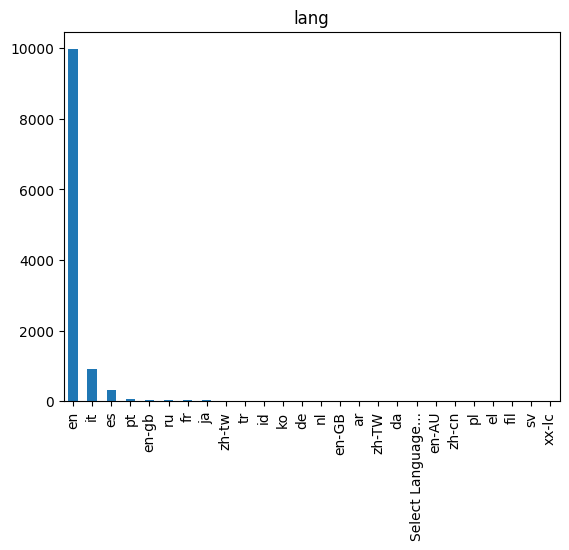

In [16]:
df_users.lang.value_counts().plot(kind='bar', title='lang') 
plt.show()

In [17]:
languages_count = df_users.lang.value_counts()
languages_count

en                    9970
it                     906
es                     319
pt                      65
en-gb                   50
ru                      42
fr                      36
ja                      33
zh-tw                   17
tr                      14
id                      12
ko                       9
de                       8
nl                       6
en-GB                    4
ar                       3
zh-TW                    3
da                       2
Select Language...       2
en-AU                    1
zh-cn                    1
pl                       1
el                       1
fil                      1
sv                       1
xx-lc                    1
Name: lang, dtype: int64

In [19]:
invalidLanguageUsers = languages_count['Select Language...'] + languages_count['xx-lc']
print("There are 2 invalid languages, 'Select Language...' and 'xx-lc'. There is a total of", invalidLanguageUsers, "users with invalid entries")

There are 2 invalid languages, 'Select Language...' and 'xx-lc'. There is a total of 3 users with invalid entries


In [21]:
usersWithInvalidLanguage = df_users.query("lang == 'Select Language...' | lang == 'xx-lc'")
usersWithInvalidLanguage

,name,lang,bot,created_at,statuses_count
id,,,,,
2956613720,Leanne Arker,Select Language...,0,2020-01-05 00:09:59,57.0
2904858613,Brooke,Select Language...,0,2019-11-22 05:44:46,85.0
29552151,Chloe,xx-lc,0,2014-04-09 21:36:02,15398.0


## Bot

In [22]:
df_users.bot.unique()

array([1, 0])

In [23]:
df_users.bot.value_counts()

1    6116
0    5392
Name: bot, dtype: int64

In [24]:
print(df_users.bot.isna().sum(), "missing bot attributes")

0 missing bot attributes


In [33]:
bots=df_users[df_users.bot==1]
real_users=df_users[df_users.bot==0]
print(len(bots.lang.unique()), "languages 'spoken' by bots:", bots.lang.unique())

14 languages 'spoken' by bots: ['en' 'it' 'fr' 'ru' 'es' 'pt' 'tr' 'ko' 'de' 'id' 'ja' 'nl' 'zh-cn'
 'en-gb']


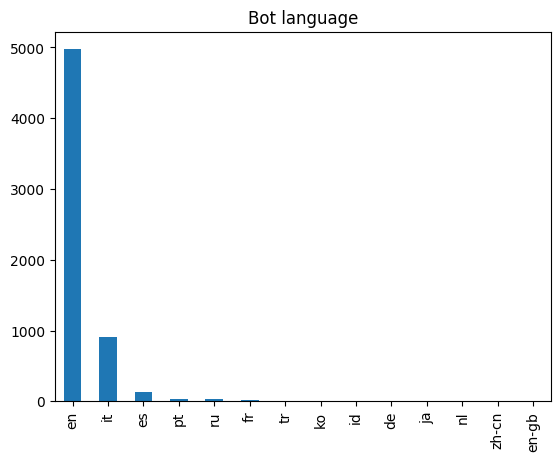

In [27]:
bots.lang.value_counts().plot(kind='bar', title='Bot language') 
plt.show()

## Created_at

In [28]:
print(df_users.created_at.isna().sum(), "missing created_at attributes")

0 missing created_at attributes


In [30]:
df_users.created_at = pd.to_datetime(df_users.created_at, format='%Y-%m-%d %H:%M:%S')
df_users.dtypes

name                      object
lang                      object
bot                        int64
created_at        datetime64[ns]
statuses_count           float64
dtype: object

In [31]:
df_users.created_at.unique()

array(['2019-02-22T18:00:42.000000000', '2019-02-26T03:02:32.000000000',
       '2015-04-30T07:09:56.000000000', ...,
       '2015-03-29T17:01:24.000000000', '2019-03-13T02:44:13.000000000',
       '2017-11-09T23:24:16.000000000'], dtype='datetime64[ns]')

In [32]:
df_users.created_at.value_counts()

2017-06-25 15:33:05    5
2017-06-25 15:46:48    4
2017-06-25 15:46:43    4
2017-06-25 15:48:32    3
2017-06-25 15:49:23    2
                      ..
2018-02-15 08:33:00    1
2014-08-08 12:47:25    1
2017-06-26 07:20:41    1
2019-02-22 05:36:50    1
2017-11-09 23:24:16    1
Name: created_at, Length: 11423, dtype: int64

In [34]:
real_users.created_at.value_counts()

2017-06-25 15:48:32    2
2018-02-15 09:57:21    2
2017-06-25 15:47:49    2
2018-02-15 08:10:57    2
2019-02-26 03:02:32    1
                      ..
2018-04-15 22:21:01    1
2018-07-27 14:25:40    1
2015-06-25 19:01:20    1
2019-03-14 02:32:29    1
2017-11-09 23:24:16    1
Name: created_at, Length: 5388, dtype: int64

In [38]:
# Group by day of the week
created_at_by_day = df_users.groupby([df_users.created_at.dt.day_name().rename("day")]).created_at.agg(count="count").reset_index()
created_at_by_day

,day,count
0,Friday,1341
1,Monday,1560
2,Saturday,1093
3,Sunday,1555
4,Thursday,2453
5,Tuesday,1731
6,Wednesday,1775


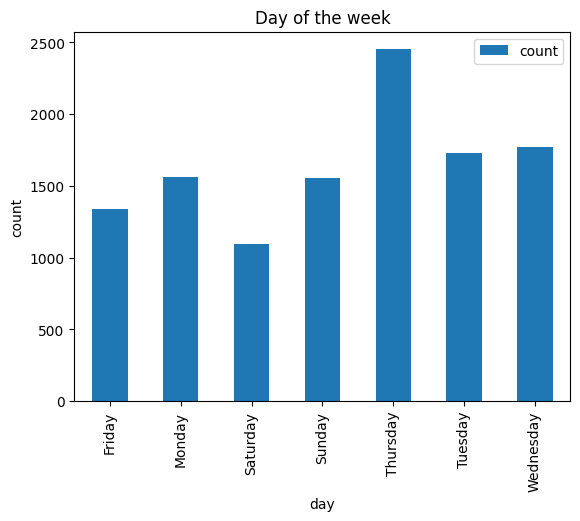

In [39]:
created_at_by_day.plot(kind='bar', title='Day of the week', x="day", y="count")
plt.ylabel("count")
plt.show()

In [40]:
# Group by month
created_at_by_month = df_users.groupby([df_users.created_at.dt.month_name().rename("month")]).created_at.agg(count="count").reset_index()
created_at_by_month

,month,count
0,April,489
1,August,344
2,December,360
3,February,3098
4,January,1483
5,July,539
6,June,1530
7,March,2178
8,May,459
9,November,354


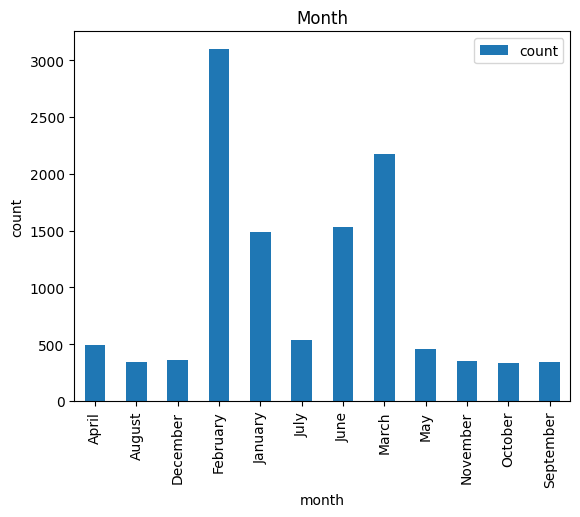

In [41]:
created_at_by_month.plot(kind='bar', title='Month', x="month", y="count")
plt.ylabel("count")
plt.show()

In [42]:
# Group by year
created_at_by_year = df_users.groupby([df_users.created_at.dt.year.rename("year")]).created_at.agg(count="count").reset_index()
created_at_by_year

,year,count
0,2012,35
1,2013,115
2,2014,720
3,2015,720
4,2016,979
5,2017,2872
6,2018,1994
7,2019,3935
8,2020,138


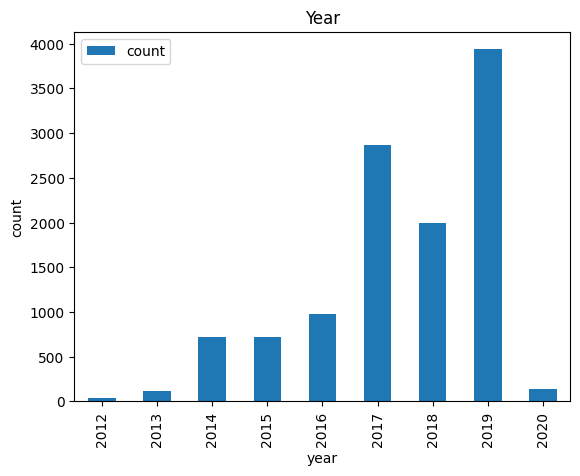

In [43]:
created_at_by_year.plot(kind='bar', title='Year', x="year", y="count")
plt.ylabel("count")
plt.show()

In [44]:
df_users.created_at.max()

Timestamp('2020-04-21 07:28:31')

In [45]:
df_users.created_at.min()

Timestamp('2012-01-24 01:57:38')

## Statuses_count

In [46]:
print(df_users.statuses_count.isna().sum(), "missing statuses_count values")

399 missing statuses_count values


In [47]:
if df_users.statuses_count.apply(float.is_integer).all():
    print("All the records have integer status_count attribute")
else:
    print("Some records have float status_count attribute")

Some records have float status_count attribute


In [48]:
df_users.statuses_count[df_users.statuses_count.notna()].max()

399555.0

Number of bins: 13


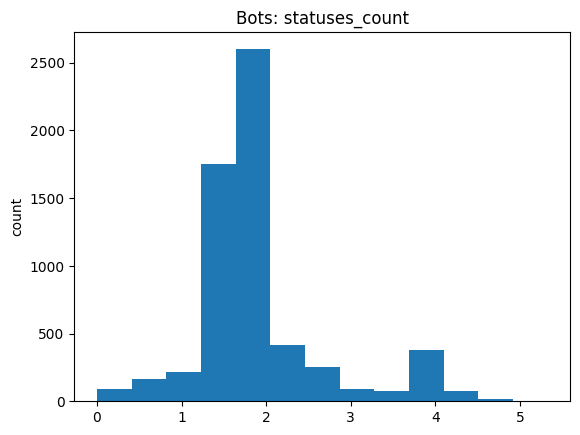

In [50]:
bots_log_statuses_count = pd.DataFrame(np.log10(1+bots.statuses_count[bots.statuses_count.notna()]))
numberOfBins = int(np.log2(len(bots.statuses_count[bots.statuses_count.notna()])) + 1)
print("Number of bins:", numberOfBins)
bots_log_statuses_count.statuses_count.plot(kind='hist', title='Bots: statuses_count', bins=numberOfBins)
plt.ylabel("count")
plt.show()

<AxesSubplot: >

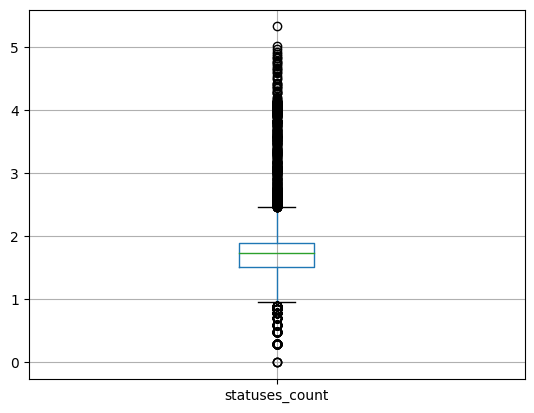

In [51]:
bots_log_statuses_count.boxplot(column='statuses_count')

Number of bins: 13


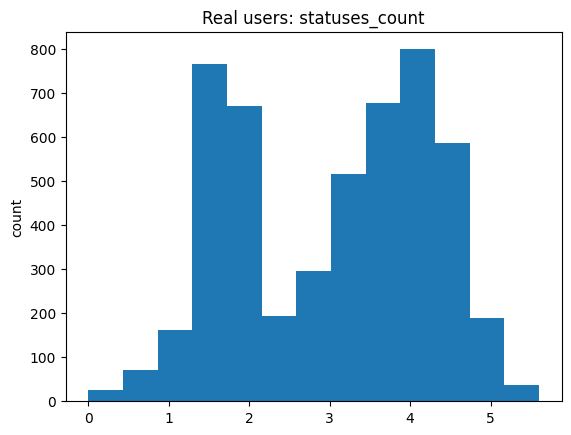

In [52]:
real_users_log_statuses_count = pd.DataFrame(np.log10(1+real_users.statuses_count[real_users.statuses_count.notna()]))
numberOfBins = int(np.log2(len(real_users.statuses_count[real_users.statuses_count.notna()])) + 1)
print("Number of bins:", numberOfBins)
real_users_log_statuses_count.statuses_count.plot(kind='hist', title='Real users: statuses_count', bins=numberOfBins)
plt.ylabel("count")
plt.show()

<AxesSubplot: >

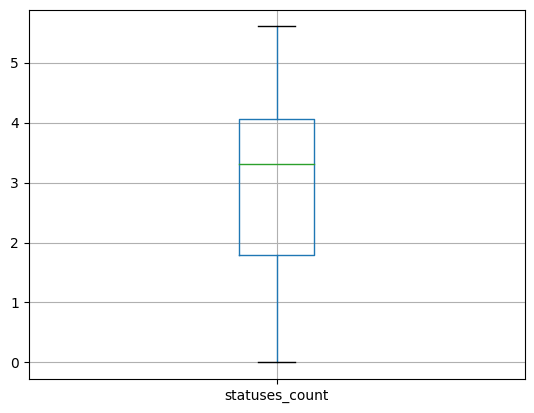

In [53]:
real_users_log_statuses_count.boxplot(column='statuses_count')

Number of bins: 14


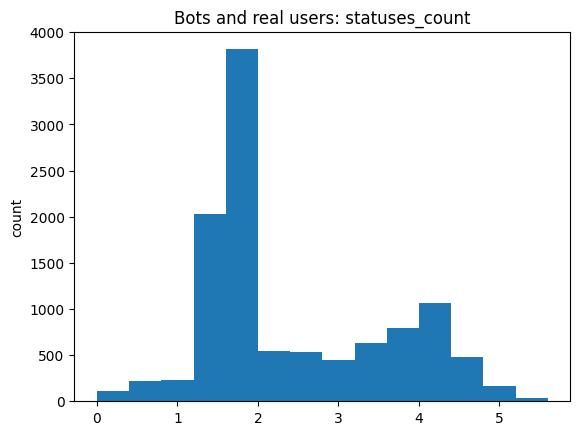

In [58]:
log_statuses_count = pd.DataFrame(np.log10(1+df_users.statuses_count[df_users.statuses_count.notna()]))
numberOfBins = int(np.log2(len(df_users.statuses_count[df_users.statuses_count.notna()])) + 1)
print("Number of bins:", numberOfBins)
log_statuses_count.statuses_count.plot(kind='hist', title='Bots and real users: statuses_count', bins=numberOfBins)
plt.ylabel("count")
plt.show()

<AxesSubplot: >

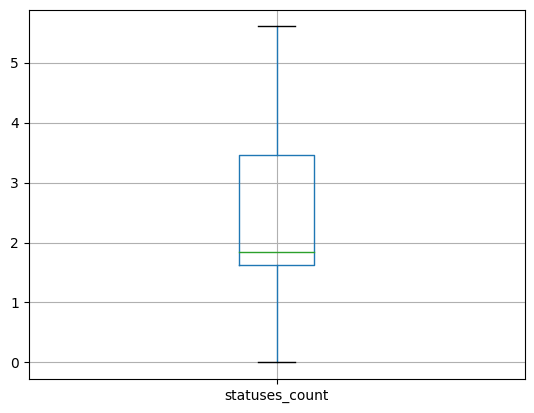

In [55]:
log_statuses_count.boxplot(column='statuses_count')

In [60]:
bots.statuses_count.describe()

count      6116.000000
mean       1185.102845
std        5373.550630
min           0.000000
25%          32.000000
50%          53.000000
75%          78.000000
max      214410.000000
Name: statuses_count, dtype: float64

In [59]:
real_users.statuses_count.describe()

count      4993.000000
mean      11638.219107
std       26719.438432
min           0.000000
25%          61.000000
50%        2041.000000
75%       11585.000000
max      399555.000000
Name: statuses_count, dtype: float64